<a href="https://colab.research.google.com/github/ribka-5/Machine-Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

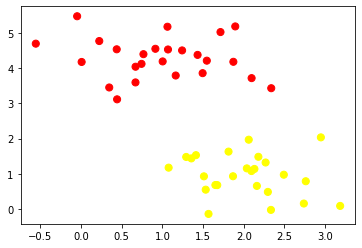

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

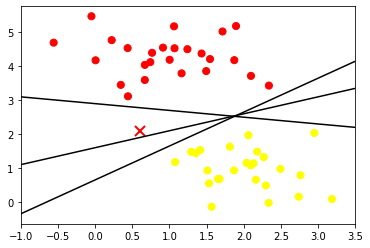

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2,
markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

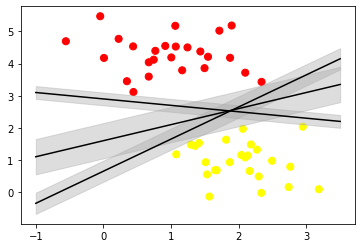

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',color='#AAAAAA', alpha=0.4)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

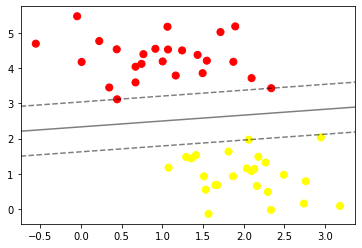

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)
  ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

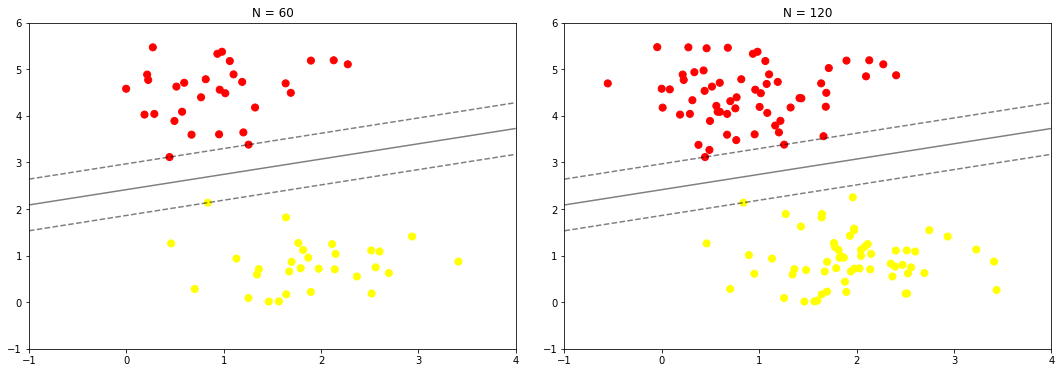

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

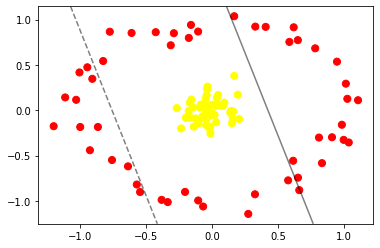

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

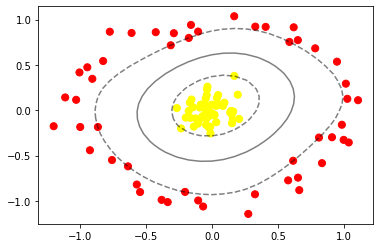

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

Latihan 2

In [ ]:
url='https://drive.google.com/file/d/1EgLi2F__NfPO2W_C7o0DK_HZL2S_M-t5/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head(10)

,Unnamed: 0,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Reviews,Customer Rating,Customer Reviews,Sentiment,Emotion
0,0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G...,North Jakarta,53500,4.9,5449,2369,5,Thank God it's working fine. Safe packaging. ...,Positive,Happy
1,1,Computers and Laptops,WINDOWS 10 PRO AND OFFICE 2019 LICENSE PACK O...,South Tangerang City,72000,4.9,2359,1044,5,"good stuff and fast response, competitive pri...",Positive,Happy
2,2,Computers and Laptops,Midasforce SSD 128 Gb - No Caddy,West Jakarta,213000,5.0,12300,3573,5,"good item, works well, friendly seller, fast ...",Positive,Happy
3,3,Computers and Laptops,CHARGER MONITOR ADAPTER LCD LED TV LG brand L...,East Jakarta,55000,4.7,2030,672,5,good as expected the seller is also friendly....,Positive,Happy
4,4,Computers and Laptops,CHARGER MONITOR ADAPTER LCD LED TV LG brand L...,East Jakarta,55000,4.7,2030,672,5,"Good stuff, safe packaging, works well",Positive,Happy
5,5,Computers and Laptops,CHARGER MONITOR ADAPTER LCD LED TV LG brand L...,East Jakarta,55000,4.7,2030,672,5,"good item, friendly seller..",Positive,Happy
6,6,Computers and Laptops,Macbook Charger Power Plug Head for Indonesian...,South Jakarta,85000,4.9,1339,718,5,good patent joss,Positive,Happy
7,7,Computers and Laptops,AFL Bidirectional HDMI Switcher 1-In 2-Out & ...,West Jakarta,136500,5.0,1201,632,5,"Works fine. Fast response from seller, item w...",Positive,Happy
8,8,Computers and Laptops,AFL Bidirectional HDMI Switcher 1-In 2-Out & ...,West Jakarta,136500,5.0,1201,632,5,good item.. seal.. intact.. original.. functi...,Positive,Happy
9,9,Computers and Laptops,Original Asus Laptop Charger Adapter X441 X44...,West Jakarta,113777,4.9,1630,777,5,Item arrived and works well and looks good wh...,Positive,Happy


In [ ]:
df.tail(10)

,Unnamed: 0,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Reviews,Customer Rating,Customer Reviews,Sentiment,Emotion
5390,5390,Household,Plastic Bubble Wrap - BUBBLEWRAP,North Jakarta,2500,4.8,2872,949,5,"sip, the package arrived safely, hope it work...",Positive,Happy
5391,5391,Household,PRACTICAL RATTRA RAT RATS RAT Clamp RAT MODEL ...,West Jakarta,5900,4.8,1855,201,5,"When tested with a stick, the shots were grea...",Positive,Happy
5392,5392,Household,PCK-01 Pickup Tool Ver.1 Garbage Clamp Tool,Central Jakarta,35000,4.9,1431,562,5,I just took a test to pick up trash in the ri...,Positive,Happy
5393,5393,Household,PCK-01 Pickup Tool Ver.1 Garbage Clamp Tool,Central Jakarta,35000,4.9,1431,562,5,"The goods have arrived and are well received,...",Positive,Happy
5394,5394,Household,PCK-01 Pickup Tool Ver.1 Garbage Clamp Tool,Central Jakarta,35000,4.9,1431,562,5,"appropriate product,, useful for cleaning gar...",Positive,Happy
5395,5395,Household,PCK-01 Pickup Tool Ver.1 Garbage Clamp Tool,Central Jakarta,35000,4.9,1431,562,5,"Competitive prices, items made to order. I add...",Positive,love
5396,5396,Household,Ultrasonic Aroma Diffuser Humidifier Colorful...,North Jakarta,99000,4.9,15529,4074,5,Bought this because my wife and children are ...,Positive,love
5397,5397,Household,Ultrasonic Aroma Diffuser Humidifier Colorful...,North Jakarta,99000,4.9,15529,4074,5,"good packaging, the condition of the goods is ...",Positive,Happy
5398,5398,Household,Ultrasonic Aroma Diffuser Humidifier Colorful...,North Jakarta,99000,4.9,15529,4074,5,Tiny but works well. And it's cheap and affor...,Positive,Happy
5399,5399,Household,TDS Meter 3 Measuring Instrument Hydroponics ...,North Jakarta,14400,4.9,4765,3044,5,"The product corresponds to the description, s...",Positive,love


In [ ]:
df.shape

(5400, 12)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Category', ' Product Name', ' Location', ' Price',
       ' Overall Rating', ' Number Sold', ' Total Reviews', ' Customer Rating',
       ' Customer Reviews', ' Sentiment', ' Emotion'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5400 non-null   int64  
 1   Category           5400 non-null   object 
 2    Product Name      5400 non-null   object 
 3    Location          5400 non-null   object 
 4    Price             5400 non-null   int64  
 5    Overall Rating    5400 non-null   float64
 6    Number Sold       5400 non-null   int64  
 7    Total Reviews     5400 non-null   int64  
 8    Customer Rating   5400 non-null   int64  
 9    Customer Reviews  5400 non-null   object 
 10   Sentiment         5400 non-null   object 
 11   Emotion           5400 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 506.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,Price,Overall Rating,Number Sold,Total Reviews,Customer Rating
count,5400.000000,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000
mean,2699.500000,2.386961e+05,4.854389,15961.951852,2168.645556,3.087037
std,1558.990058,8.016337e+05,0.108259,74201.913338,2915.666035,1.766258
min,0.000000,1.000000e+02,4.100000,9.000000,4.000000,1.000000
25%,1349.750000,2.000000e+04,4.800000,1630.000000,576.000000,1.000000
50%,2699.500000,5.990000e+04,4.900000,3794.500000,1192.000000,3.000000
75%,4049.250000,1.500000e+05,4.900000,9707.000000,2582.000000,5.000000
max,5399.000000,1.539900e+07,5.000000,1000000.000000,24500.000000,5.000000


In [ ]:
df.isnull().sum()

Unnamed: 0           0
Category             0
 Product Name        0
 Location            0
 Price               0
 Overall Rating      0
 Number Sold         0
 Total Reviews       0
 Customer Rating     0
 Customer Reviews    0
 Sentiment           0
 Emotion             0
dtype: int64

In [ ]:
df[' Emotion'].value_counts()

 Happy      1770
 Sadness    1202
 Fear        920
 love        809
 Anger       699
Name:  Emotion, dtype: int64

In [ ]:
(df[' Emotion'].value_counts()/df[' Emotion'].count())*100

 Happy      32.777778
 Sadness    22.259259
 Fear       17.037037
 love       14.981481
 Anger      12.944444
Name:  Emotion, dtype: float64

In [ ]:
emo = pd.concat([df[' Emotion'].value_counts(normalize=True),
                df[' Emotion'].value_counts()],
                axis=1,
                keys=('perc','count'))
emo

,perc,count
Happy,0.327778,1770
Sadness,0.222593,1202
Fear,0.170370,920
love,0.149815,809
Anger,0.129444,699


In [ ]:
df[' Sentiment'].value_counts()

 negative    2821
 Positive    2579
Name:  Sentiment, dtype: int64

In [ ]:
(df[' Sentiment'].value_counts()/df[' Sentiment'].count())*100

 negative    52.240741
 Positive    47.759259
Name:  Sentiment, dtype: float64

In [ ]:
sen = pd.concat([df[' Sentiment'].value_counts(normalize=True),
                df[' Sentiment'].value_counts()],
                axis=1,
                keys=('perc','count'))
sen

,perc,count
negative,0.522407,2821
Positive,0.477593,2579


In [ ]:
df['Category'].value_counts()

 Computers and Laptops       200
 Kitchen                     200
 Health                      200
 Beauty                      200
 Camera                      200
 Mother and Baby             200
 Phones and Tablets          200
 Gaming                      200
 Movies and Music            200
 Women's Fashion             200
 Men's Fashion               200
 Muslim Fashion              200
 Kids and Baby Fashion       200
 Electronics                 200
 Books                       200
 Toys and Hobbies            200
 Sport                       200
 Other Products              200
 Carpentry                   200
 Party Supplies and Craft    200
 Body Care                   200
 Animal Care                 200
 Automotive                  200
 Office & Stationery         200
 Food and Drink              200
 Household                   200
 Tour and Travel              80
 Precious Metal               80
 property                     40
Name: Category, dtype: int64

In [ ]:
(df['Category'].value_counts()/df['Category'].count())*100

 Computers and Laptops       3.703704
 Kitchen                     3.703704
 Health                      3.703704
 Beauty                      3.703704
 Camera                      3.703704
 Mother and Baby             3.703704
 Phones and Tablets          3.703704
 Gaming                      3.703704
 Movies and Music            3.703704
 Women's Fashion             3.703704
 Men's Fashion               3.703704
 Muslim Fashion              3.703704
 Kids and Baby Fashion       3.703704
 Electronics                 3.703704
 Books                       3.703704
 Toys and Hobbies            3.703704
 Sport                       3.703704
 Other Products              3.703704
 Carpentry                   3.703704
 Party Supplies and Craft    3.703704
 Body Care                   3.703704
 Animal Care                 3.703704
 Automotive                  3.703704
 Office & Stationery         3.703704
 Food and Drink              3.703704
 Household                   3.703704
 Tour and Tr

In [ ]:
cat = pd.concat([df['Category'].value_counts(normalize=True),
                df['Category'].value_counts()],
                axis=1,
                keys=('perc','count'))
cat

,perc,count
Computers and Laptops,0.037037,200
Kitchen,0.037037,200
Health,0.037037,200
Beauty,0.037037,200
Camera,0.037037,200
Mother and Baby,0.037037,200
Phones and Tablets,0.037037,200
Gaming,0.037037,200
Movies and Music,0.037037,200
Women's Fashion,0.037037,200


In [ ]:
df[' Customer Rating'].value_counts()

5    2150
1    1832
2     561
3     462
4     395
Name:  Customer Rating, dtype: int64

In [ ]:
(df[' Customer Rating'].value_counts()/df[' Customer Rating'].count())*100

5    39.814815
1    33.925926
2    10.388889
3     8.555556
4     7.314815
Name:  Customer Rating, dtype: float64

In [ ]:
cus = pd.concat([df[' Customer Rating'].value_counts(normalize=True),
                df[' Customer Rating'].value_counts()],
                axis=1,
                keys=('perc','count'))
cus

,perc,count
5,0.398148,2150
1,0.339259,1832
2,0.103889,561
3,0.085556,462
4,0.073148,395


In [ ]:
df[' Overall Rating'].value_counts()

4.9    2625
4.8    1256
5.0     737
4.7     530
4.6     184
4.5      28
4.4      26
4.3       9
4.2       4
4.1       1
Name:  Overall Rating, dtype: int64

In [ ]:
(df[' Overall Rating'].value_counts()/df[' Overall Rating'].count())*100

4.9    48.611111
4.8    23.259259
5.0    13.648148
4.7     9.814815
4.6     3.407407
4.5     0.518519
4.4     0.481481
4.3     0.166667
4.2     0.074074
4.1     0.018519
Name:  Overall Rating, dtype: float64

In [ ]:
over = pd.concat([df[' Overall Rating'].value_counts(normalize=True),
                df[' Overall Rating'].value_counts()],
                axis=1,
                keys=('perc','count'))
over

,perc,count
4.9,0.486111,2625
4.8,0.232593,1256
5.0,0.136481,737
4.7,0.098148,530
4.6,0.034074,184
4.5,0.005185,28
4.4,0.004815,26
4.3,0.001667,9
4.2,0.000741,4
4.1,0.000185,1


In [ ]:
min_temp = [' Price', ' Overall Rating', ' Number Sold', ' Total Reviews', ' Customer Rating']
for i in min_temp:
    fig = plt.figure(figsize=(20,5))
    sns.boxplot(df[i], color='blue')
    fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  8.815659677009789
Kurtosis:  103.41795003858174


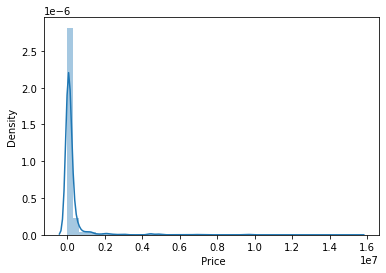

In [ ]:
sns.distplot(df[' Price'])
print("Skewness: ", df[' Price'].skew())
print("Kurtosis: ", df[' Price'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  -1.3765826860809653
Kurtosis:  3.590036824214169


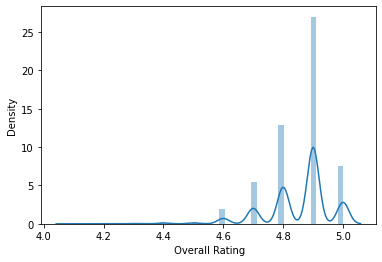

In [ ]:
sns.distplot(df[' Overall Rating'])
print("Skewness: ", df[' Overall Rating'].skew())
print("Kurtosis: ", df[' Overall Rating'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  11.015313494989744
Kurtosis:  130.54308335466735


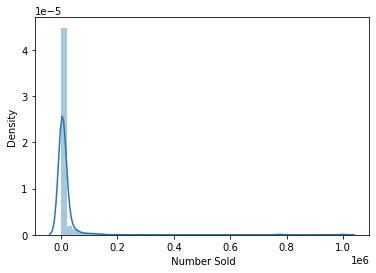

In [ ]:
sns.distplot(df[' Number Sold'])
print("Skewness: ", df[' Number Sold'].skew())
print("Kurtosis: ", df[' Number Sold'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  3.7321364896187306
Kurtosis:  18.281855206832407


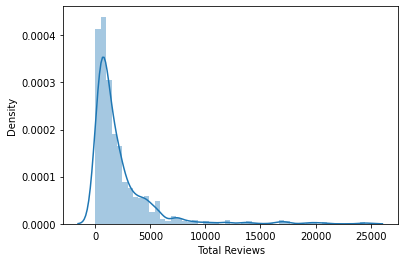

In [ ]:
sns.distplot(df[' Total Reviews'])
print("Skewness: ", df[' Total Reviews'].skew())
print("Kurtosis: ", df[' Total Reviews'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  -0.06804300858265651
Kurtosis:  -1.7707495893589582


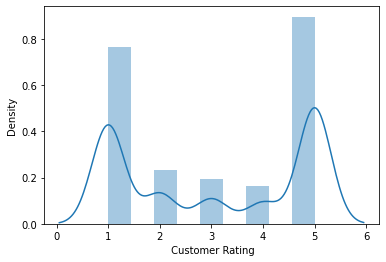

In [ ]:
sns.distplot(df[' Customer Rating'])
print("Skewness: ", df[' Customer Rating'].skew())
print("Kurtosis: ", df[' Customer Rating'].kurt())

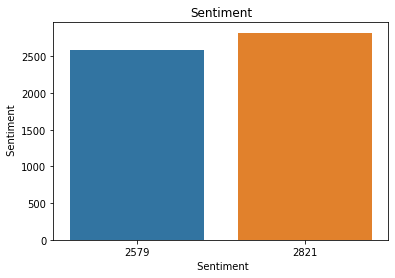

In [ ]:
def distribution_plot(x, y, name):
  sns.barplot(x=x, y=y)
  plt.title(name)
  plt.show()

dist_x = df[' Sentiment'].value_counts()
dist_y = df[' Sentiment'].value_counts()

distribution_plot(dist_x, dist_y, ('Sentiment'))

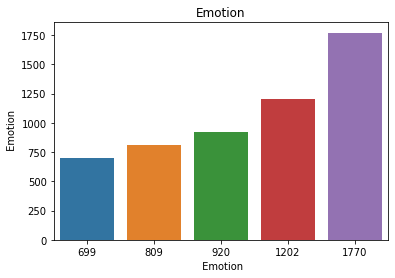

In [ ]:
def distribution_plot(x, y, name):
  sns.barplot(x=x, y=y)
  plt.title(name)
  plt.show()

dist_x = df[' Emotion'].value_counts()
dist_y = df[' Emotion'].value_counts()

distribution_plot(dist_x, dist_y, ('Emotion'))

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
corpus = []
for i in range(0,5400):
 # Cleaning special character from the reviews
 review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df[' Customer Reviews'][i])
 # Converting the entire review into lower case
 review = review.lower()
 # Tokenizing the review by words
 review_words = review.split()
 # Removing the stop words
 review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
 # Stemming the words
 ps = PorterStemmer()
 review = [ps.stem(word) for word in review_words]
 # Joining the stemmed words
 review = ' '.join(review)
 # Creating a corpus
 corpus.append(review)

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 10].values

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_pred,y_test)
cm = confusion_matrix(y_test,y_pred)

print("Classification report:")
print("Accuracy:",accuracy)
print(report)
print("Confusion Matrix:")
print(cm)

Classification report:
Accuracy: 0.9055555555555556
              precision    recall  f1-score   support

    Positive       0.91      0.90      0.90       784
    negative       0.91      0.91      0.91       836

    accuracy                           0.91      1620
   macro avg       0.91      0.91      0.91      1620
weighted avg       0.91      0.91      0.91      1620

Confusion Matrix:
[[705  74]
 [ 79 762]]
